<a href="https://colab.research.google.com/github/Kusalani/Surge-Assignment---Apache-spark-Pyspark/blob/master/SurgeAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,959 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://security.ubuntu.

In [ ]:
# Dataset Path and Tables
# /content/DS_DE Internship - GS Sales Data 2022.xlsx
# Sheet Names
# 1> GS Sales Data
# 2> Daily Target

In [ ]:
#install jdk
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

tar: spark-3.2.0-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!pip install -q findspark

In [ ]:
# Install and Configure PySpark on Colab
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 199 kB 41.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=f818551f8500bc9560c0671334dce6ce18103a80dd1efc72310b84beb1d8fe4d
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 156030 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.5) ...


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 156035 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 7.1 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=52d361e2ca291d2ce0fd7473adc1d6f6fae907655f6bcd9636e04d07b25884b0
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 2.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 35.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 31.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 3.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 13.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 2.7 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-

In [ ]:
# Load Library
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import to_date, col
from pyspark.sql import DataFrame, SparkSession, types as T
import numpy as np
from datetime import datetime
# Build Spark Session
spark = SparkSession.builder.appName('DS Internship Task1').getOrCreate()

In [ ]:
# Read Data from Dataset i.e. Excel file : Sheet "GS Sales Data"
GS_Sales_Pdf = pd.read_excel('/content/DS_DE Internship - GS Sales Data 2022.xlsx',sheet_name='GS Sales Data', index_col=0,
                             na_values='#N/A')
# Display top 5 record loaded into Pandas DF
GS_Sales_Pdf.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
Row ID,,,,,,,,,,,,,,,,,,,,,
1.0,US-2019-103800,2019-01-03,2019-1,2019-01-07,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,5.5512,NaN
2.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2.0,0.8,-5.4870,NaN
3.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,4.2717,NaN
4.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3.0,0.2,-64.7748,NaN
5.0,US-2019-141817,2019-01-05,2019-1,2019-01-12,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.0,0.2,4.8840,NaN


### Question-1

In [ ]:
# Cast field data types on pandas DF to String due to some fields contain "#N/A" values to avoid data type conversion errors in spark
GS_Sales_Pdf[['State/Province', 'Country/Region','Regional Manager','Customer Name','Returned','Category']] = GS_Sales_Pdf[['State/Province', 'Country/Region','Regional Manager','Customer Name','Returned','Category']].astype(str)

In [ ]:
# Create Spark Dataframe
GS_Sales = spark.createDataFrame(GS_Sales_Pdf)

# View first 20 rows in spark dataframe 
GS_Sales.show()

+--------------+-------------------+----------+-------------------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+------------------+--------+--------+-------------------+--------+
|      Order ID|         Order Date|Order_Week|          Ship Date|Ship_Week|     Ship Mode|Customer ID|   Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|             Sales|Quantity|Discount|             Profit|Returned|
+--------------+-------------------+----------+-------------------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+------------------+-------

In [ ]:
# View spark Data Frame Schema
GS_Sales.printSchema()

root
 |-- Order ID: string (nullable = true)
 |-- Order Date: timestamp (nullable = true)
 |-- Order_Week: string (nullable = true)
 |-- Ship Date: timestamp (nullable = true)
 |-- Ship_Week: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State/Province: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Regional Manager: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)
 |-- Returned: string (nullable =

In [ ]:
type(GS_Sales)

pyspark.sql.dataframe.DataFrame

In [ ]:
# Create New Spark Dataframe and Transform Column Headings and Data Types

GS_Sales_finalDF = (GS_Sales.withColumn("order_id", GS_Sales["Order ID"]).drop("Order ID")
              .withColumn("order_date", to_date(col("Order Date"), "mm/dd/yyyy")).drop("Order Date")
              .withColumn("order_week_no", GS_Sales["Order_Week"]).drop("Order_Week")
              .withColumn("ship_date", to_date(col("Ship Date"), "mm/dd/yyyy")).drop("Ship Date")
              .withColumn("ship_week_no", GS_Sales["Ship_Week"]).drop("Ship_Week")
              .withColumn("ship_mode", GS_Sales["Ship Mode"]).drop("Ship Mode")
              .withColumn("customer_id", GS_Sales["Customer ID"]).drop("Customer ID")
              .withColumn("customer_name", GS_Sales["Customer Name"]).drop("Customer Name")
              .withColumn("customer_segment", GS_Sales["Segment"]).drop("Segment")
              .withColumn("country_region", GS_Sales["Country/Region"]).drop("Country/Region")
              .withColumn("customer_city", GS_Sales["City"]).drop("City")
              .withColumn("state_province", GS_Sales["State/Province"]).drop("State/Province")
              .withColumn("postal_code", GS_Sales["Postal Code"]).drop("Postal Code")
              .withColumn("customer_region", GS_Sales["Region"]).drop("Region")
              .withColumn("regional_manager", GS_Sales["Regional Manager"]).drop("Regional Manager")
              .withColumn("product_id", GS_Sales["Product ID"]).drop("Product ID")
              .withColumn("product_category", GS_Sales["Category"]).drop("Category")
              .withColumn("sub_category", GS_Sales["Sub-Category"]).drop("Sub-Category")
              .withColumn("product_name", GS_Sales["Product Name"]).drop("Product Name")
              .withColumn("sales_revenue", GS_Sales["Sales"].cast('float')).drop("Sales")
              .withColumn("sales_quantity", GS_Sales["Quantity"].cast("float")).drop("Quantity")
              .withColumn("discount_amount", GS_Sales["Discount"].cast('float')).drop("Discount")
              .withColumn("sales_profit", GS_Sales["Profit"].cast('float')).drop("Profit")
              .drop("Returned")
              .distinct()
            ) 

GS_Sales_finalDF.show(20)

+--------------+----------+-------------+----------+------------+--------------+-----------+-------------------+----------------+--------------+-------------+--------------+-----------+---------------+-----------------+---------------+----------------+------------+--------------------+-------------+--------------+---------------+------------+
|      order_id|order_date|order_week_no| ship_date|ship_week_no|     ship_mode|customer_id|      customer_name|customer_segment|country_region|customer_city|state_province|postal_code|customer_region| regional_manager|     product_id|product_category|sub_category|        product_name|sales_revenue|sales_quantity|discount_amount|sales_profit|
+--------------+----------+-------------+----------+------------+--------------+-----------+-------------------+----------------+--------------+-------------+--------------+-----------+---------------+-----------------+---------------+----------------+------------+--------------------+-------------+----------

In [ ]:
GS_Sales_finalDF.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- order_date: date (nullable = true)
 |-- order_week_no: string (nullable = true)
 |-- ship_date: date (nullable = true)
 |-- ship_week_no: string (nullable = true)
 |-- ship_mode: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- customer_segment: string (nullable = true)
 |-- country_region: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- state_province: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- customer_region: string (nullable = true)
 |-- regional_manager: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- sales_revenue: float (nullable = true)
 |-- sales_quantity: float (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- sales_profit: flo

**Create DimCustomer Table**

In [ ]:
# Create spark SQL Select query to retrieve customer data as a DataFrame from a temporary table view
GS_Sales_finalDF.createOrReplaceTempView("sales")

DimCustomer_sqlDF = spark.sql("SELECT customer_id,	customer_name FROM sales")
DimCustomer_sqlDF.show()

+-----------+-------------------+
|customer_id|      customer_name|
+-----------+-------------------+
|   MS-17830|      Melanie Seite|
|   KN-16450|        Kean Nguyen|
|   SP-20650|   Stephanie Phelps|
|   CT-11995|       Carol Triggs|
|   EH-14185|         Evan Henry|
|   FM-14215|      Filia McAdams|
|   PV-18985|      Paul Van Hugh|
|   RS-19420|    Ricardo Sperren|
|   SM-20950|     Suzanne McNair|
|   AP-10915|     Arthur Prichep|
|   CM-12715|     Craig Molinari|
|   ST-20530|           Shui Tom|
|   ON-18715|      Odella Nelson|
|   CB-12025|  Cassandra Brandow|
|   VD-21670|  Valerie Dominguez|
|   AB-10105|      Adrian Barton|
|   PJ-18835|      Patrick Jones|
|   AG-10300|Aleksandra Gannaway|
|   CA-11965|        Carol Adams|
|   KM-16720|       Kunst Miller|
+-----------+-------------------+
only showing top 20 rows



In [ ]:
# Create spark SQL query to create a Dim Table as a DataFrame from Transformed Data Frame

DimCustomer_DF=spark.sql("SELECT DISTINCT customer_id as CustomerIDSk,	customer_name as CustomerName,  postal_code as AddressKey FROM sales")

# Print Schema of DIM Table/DataFrame
DimCustomer_DF.printSchema()

# Display top 20 Records
DimCustomer_DF.show()

root
 |-- CustomerIDSk: string (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- AddressKey: string (nullable = true)

+------------+----------------+----------+
|CustomerIDSk|    CustomerName|AddressKey|
+------------+----------------+----------+
|    JD-15895|Jonathan Doherty|     19140|
|    RB-19465|    Rick Bensley|     74133|
|    RR-19525|       Rick Reed|     01852|
|    ON-18715|   Odella Nelson|     85281|
|    SB-20290|    Sean Braxton|     77036|
|    KM-16660|    Khloe Miller|     95123|
|    KL-16555|   Kelly Lampkin|     80906|
|    GA-14725|   Guy Armstrong|     19120|
|    VW-21775| Victoria Wilson|     44256|
|    CS-12250| Chris Selesnick|     55125|
|    KB-16315|      Karl Braun|     11520|
|    SR-20740|   Steven Roelle|     10024|
|    GZ-14470|   Gary Zandusky|     87124|
|    AG-10900|   Arthur Gainer|     19134|
|    TS-21160|   Theresa Swint|     17403|
|    AY-10555|      Andy Yotov|     90049|
|    SP-20650|Stephanie Phelps|     28403|
|   

**Create DimAddress table**

In [ ]:
# Create spark SQL Select query to retrieve customer address data as a DataFrame from a temporary table view
GS_Sales_finalDF.createOrReplaceTempView("sales")

DimAddress_sqlDF = spark.sql("SELECT 	country_region, customer_city , state_province ,postal_code, customer_region , regional_manager  FROM sales")
DimAddress_sqlDF.show()

+--------------+-------------+--------------+-----------+---------------+-----------------+
|country_region|customer_city|state_province|postal_code|customer_region| regional_manager|
+--------------+-------------+--------------+-----------+---------------+-----------------+
| United States|       Laredo|         Texas|      78041|        Central|Roxanne Rodriguez|
| United States|Redondo Beach|    California|      90278|           West|  Sadie Pawthorne|
| United States|   Wilmington|North Carolina|      28403|          South|      Fred Suzuki|
| United States|     Lawrence| Massachusetts|      01841|           East|      Chuck Magee|
| United States|      Decatur|       Alabama|      35601|          South|      Fred Suzuki|
| United States|  Los Angeles|    California|      90032|           West|  Sadie Pawthorne|
| United States|  League City|         Texas|      77573|        Central|Roxanne Rodriguez|
| United States|      Meriden|   Connecticut|      06450|           East|      C

In [ ]:
# Create spark SQL query to create a Dim Table as a DataFrame from Transformed Data Frame

DimAddress_DF=spark.sql("SELECT DISTINCT postal_code as AddressSk,	country_region as CountryRegion, customer_city as City,state_province as StateProvince,customer_region as Region,regional_manager as RegionalManager FROM sales")

# Print Schema of DIM Table/DataFrame
DimAddress_DF.printSchema()

# Display top 20 Records
DimAddress_DF.show()

root
 |-- AddressSk: string (nullable = true)
 |-- CountryRegion: string (nullable = true)
 |-- City: string (nullable = true)
 |-- StateProvince: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- RegionalManager: string (nullable = true)

+---------+-------------+--------------+-------------+-------+-----------------+
|AddressSk|CountryRegion|          City|StateProvince| Region|  RegionalManager|
+---------+-------------+--------------+-------------+-------+-----------------+
|    33012|United States|       Hialeah|      Florida|  South|      Fred Suzuki|
|    33021|United States|     Hollywood|      Florida|  South|      Fred Suzuki|
|    48205|United States|       Detroit|     Michigan|Central|Roxanne Rodriguez|
|    84062|United States|Pleasant Grove|         Utah|   West|  Sadie Pawthorne|
|    44256|United States|        Medina|         Ohio|   East|      Chuck Magee|
|    32216|United States|  Jacksonville|      Florida|  South|      Fred Suzuki|
|    48180|Un

**Create DimProduct table**

In [ ]:
# Create spark SQL Select query to retrieve product data as a DataFrame from a temporary table view
GS_Sales_finalDF.createOrReplaceTempView("sales")

DimProduct_sqlDF = spark.sql("SELECT 	product_id,product_category,sub_category, product_name FROM sales")
DimProduct_sqlDF.show()

+---------------+----------------+------------+--------------------+
|     product_id|product_category|sub_category|        product_name|
+---------------+----------------+------------+--------------------+
|TEC-AC-10001266|      Technology| Accessories|Memorex Micro Tra...|
|FUR-BO-10001337|       Furniture|   Bookcases|O'Sullivan Living...|
|OFF-AR-10003478| Office Supplies|         Art|Avery Hi-Liter Ev...|
|OFF-AR-10002578| Office Supplies|         Art|          Newell 335|
|TEC-PH-10002660|      Technology|      Phones|Nortel Networks T...|
|OFF-AR-10003631| Office Supplies|         Art|Staples in misc. ...|
|OFF-AR-10003158| Office Supplies|         Art|Fluorescent Highl...|
|OFF-AP-10002765| Office Supplies|  Appliances|Fellowes Advanced...|
|OFF-ST-10004459| Office Supplies|     Storage|Tennsco Single-Ti...|
|TEC-MA-10004241|      Technology|    Machines|Star Micronics TS...|
|OFF-BI-10004140| Office Supplies|     Binders|Avery Non-Stick B...|
|OFF-BI-10004236| Office Supplies|

In [ ]:
# Create spark SQL query to create a Dim Table as a DataFrame from Transformed Data Frame

DimProduct_DF=spark.sql("SELECT DISTINCT product_id as ProductIDSk,product_category as ProductCategory,sub_category as ProductSubCategory,	product_name as ProductName  FROM sales")

# Print Schema of DIM Table/DataFrame
DimProduct_DF.printSchema()

# Display top 20 Records
DimProduct_DF.show()

root
 |-- ProductIDSk: string (nullable = true)
 |-- ProductCategory: string (nullable = true)
 |-- ProductSubCategory: string (nullable = true)
 |-- ProductName: string (nullable = true)

+---------------+---------------+------------------+--------------------+
|    ProductIDSk|ProductCategory|ProductSubCategory|         ProductName|
+---------------+---------------+------------------+--------------------+
|TEC-PH-10001552|     Technology|            Phones|I Need's 3d Hello...|
|OFF-AR-10001953|Office Supplies|               Art|Boston 1645 Delux...|
|TEC-AC-10001767|     Technology|       Accessories|SanDisk Ultra 64 ...|
|OFF-PA-10001937|Office Supplies|             Paper|            Xerox 21|
|OFF-PA-10003039|Office Supplies|             Paper|          Xerox 1960|
|OFF-EN-10000483|Office Supplies|         Envelopes|White Envelopes, ...|
|FUR-BO-10004360|      Furniture|         Bookcases|Rush Hierlooms Co...|
|TEC-AC-10001314|     Technology|       Accessories|Case Logic 2.4GHz..

**Create DimDate table**

In [ ]:
def create_calender_date_table(start='2019-01-01', end='2080-12-31'):
   df = pd.DataFrame({"date": pd.date_range(start, end)})
   df["week_day"] = df.date.dt.weekday_name
   df["day"] = df.date.dt.day
   df["month"] = df.date.dt.month
   df["week"] = df.date.dt.weekofyear
   df["quarter"] = df.date.dt.quarter
   df["year"] = df.date.dt.year
   df.insert(0, 'date_id', (df.year.astype(str) + df.month.astype(str).str.zfill(2) + df.day.astype(str).str.zfill(2)).astype(int))
   return df

**Create FactOrder table**

In [ ]:
# Create spark SQL query to create a Fact Table as a DataFrame from Transformed Data Frame

FactOrders_DF=spark.sql("SELECT DISTINCT order_id as OrderID,	order_date as OrderDate,  ship_date as ShipDate, ship_week_no as ShipWeek, ship_mode as ShipMode, customer_id as CustomerIDKey, product_id as ProductIDKey, sales_revenue as Sales, sales_quantity as Quantity, discount_amount as Discount, sales_profit as Profit FROM sales")

# Print Schema of DIM Table/DataFrame
FactOrders_DF.printSchema()

# Display top 20 Records
FactOrders_DF.show()

root
 |-- OrderID: string (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- ShipDate: date (nullable = true)
 |-- ShipWeek: string (nullable = true)
 |-- ShipMode: string (nullable = true)
 |-- CustomerIDKey: string (nullable = true)
 |-- ProductIDKey: string (nullable = true)
 |-- Sales: float (nullable = true)
 |-- Quantity: float (nullable = true)
 |-- Discount: float (nullable = true)
 |-- Profit: float (nullable = true)

+--------------+----------+----------+--------+--------------+-------------+---------------+-------+--------+--------+--------+
|       OrderID| OrderDate|  ShipDate|ShipWeek|      ShipMode|CustomerIDKey|   ProductIDKey|  Sales|Quantity|Discount|  Profit|
+--------------+----------+----------+--------+--------------+-------------+---------------+-------+--------+--------+--------+
|US-2019-162775|2019-01-13|2019-01-15|  2019-3|  Second Class|     CS-12250|OFF-ST-10000025| 572.58|     6.0|     0.0| 34.3548|
|US-2019-163223|2019-03-21|2019-03-25| 2019-13

### Question-2


**Drop null values**

In [ ]:
spark

In [ ]:
GS_Sales_Pdf.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
Row ID,,,,,,,,,,,,,,,,,,,,,
1.0,US-2019-103800,2019-01-03,2019-1,2019-01-07,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,5.5512,nan
2.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2.0,0.8,-5.4870,nan
3.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,4.2717,nan
4.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3.0,0.2,-64.7748,nan
5.0,US-2019-141817,2019-01-05,2019-1,2019-01-12,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.0,0.2,4.8840,nan


In [ ]:
#how many null values in each columns
GS_Sales_Pdf.isnull().sum()

Order ID            0
Order Date          0
Order_Week          0
Ship Date           0
Ship_Week           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country/Region      0
City                0
State/Province      0
Postal Code         0
Region              0
Regional Manager    0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Returned            0
dtype: int64

In [ ]:
df=GS_Sales_Pdf

In [ ]:
df2= df.drop('Returned' , axis= 1)

In [ ]:
##filling null values
df4 = df2.fillna(method = 'pad')
df4

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,
1.0,US-2019-103800,2019-01-03,2019-1,2019-01-07,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,5.5512
2.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2.0,0.8,-5.4870
3.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,4.2717
4.0,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3.0,0.2,-64.7748
5.0,US-2019-141817,2019-01-05,2019-1,2019-01-12,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.0,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190.0,US-2022-143259,2022-12-30,2022-53,2023-01-03,2023-1,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,...,East,Chuck Magee,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3.0,0.2,19.7910
10191.0,US-2022-115427,2022-12-30,2022-53,2023-01-03,2023-1,Standard Class,EB-13975,Erica Bern,Corporate,United States,...,West,Sadie Pawthorne,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2.0,0.2,6.4750
10192.0,US-2022-156720,2022-12-30,2022-53,2023-01-03,2023-1,Standard Class,JM-15580,Jill Matthias,Consumer,United States,...,West,Sadie Pawthorne,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3.0,0.2,-0.6048


In [ ]:
df4.isnull().sum().sum()

0

### Question-3

In [ ]:
df4.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Regional Manager,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,,,,,,,,,
Technology,US-2021-108224,2021-05-14,2021-20,2021-05-14,2021-20,Same Day,TH-21235,Tiffany House,Corporate,United States,Arizona,85364,Sadie Pawthorne,TEC-AC-10003832,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,626.8851,7.0,0.2,1068.2422
Technology,US-2022-157672,2022-10-05,2022-41,2022-10-07,2022-41,First Class,RB-19795,Ross Baird,Home Office,United States,Colorado,80219,Sadie Pawthorne,TEC-AC-10001714,Accessories,Logitech MX Performance Wireless Mouse,211.6346,2.0,0.2,359.4452
Office Supplies,US-2021-114727,2021-07-18,2021-30,2021-07-24,2021-30,Standard Class,LS-16945,Linda Southworth,Corporate,United States,Colorado,80219,Sadie Pawthorne,OFF-ST-10000689,Storage,"Fellowes Strictly Business Drawer File, Letter...",989.9160,3.0,0.2,1641.7920
Furniture,US-2019-133690,2019-08-03,2019-31,2019-08-05,2019-32,First Class,BS-11755,Bruce Stewart,Consumer,United States,Colorado,80219,Sadie Pawthorne,FUR-TA-10004289,Tables,BoxOffice By Design Rectangular and Half-Moon ...,501.8750,2.0,0.5,785.0000
Office Supplies,US-2021-114727,2021-07-18,2021-30,2021-07-24,2021-30,Standard Class,LS-16945,Linda Southworth,Corporate,United States,Colorado,80219,Sadie Pawthorne,OFF-ST-10002292,Storage,"Sauder Facets Collection Locker/File Cabinet, ...",1787.3040,2.0,0.2,2981.0400


In [ ]:
!sudo -H python3.7 -m pip uninstall numpy
!sudo apt purge python3-numpy
!sudo -H python3.7 -m pip install --upgrade pip
!sudo -H python3.7 -m pip install numpy

Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.6.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.6
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'python3-numpy' is not installed, so not removed
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Looking in indexes: https://pypi.

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot')  

print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.2.2


In [ ]:
print(df4.shape)

(10194, 23)


In [ ]:
# types of the column labels
all(isinstance(column, str) for column in df4.columns)

True

In [ ]:
df4.columns = list(map(str, df4.columns))

# column labels types 
all(isinstance(column, str) for column in df4.columns)

True

In [ ]:
df4.set_index('City', inplace=True)


df4.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
City,,,,,,,,,,,,,,,,,,,,,
Houston,US-2019-103800,2019-01-03,2019-1,2019-01-07,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,5.5512
Naperville,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2.0,0.8,-5.4870
Naperville,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,4.2717
Naperville,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3.0,0.2,-64.7748
Philadelphia,US-2019-141817,2019-01-05,2019-1,2019-01-12,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.0,0.2,4.8840


In [ ]:
df4['Profit'] = df4.sum(axis=1)

# view the first five elements 
df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
City,,,,,,,,,,,,,,,,,,,,,
Houston,US-2019-103800,2019-01-03,2019-1,2019-01-07,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,24.1992
Naperville,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2.0,0.8,0.8530
Naperville,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,19.2557
Naperville,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3.0,0.2,211.1612
Philadelphia,US-2019-141817,2019-01-05,2019-1,2019-01-12,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.0,0.2,27.6200


In [ ]:
print('data dimensions:', df4.shape)

data dimensions: (10194, 22)


In [ ]:
years = list(map(str, range(2019, 2080)))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2821b6e150>]],
      dtype=object)

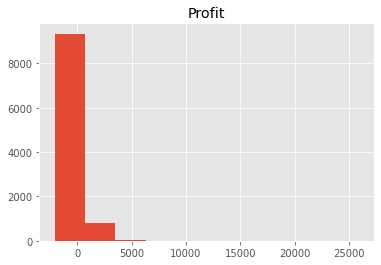

In [ ]:
from numpy.core import numeric



df4.hist('Profit')
#bar_data = df3.groupby(['Country','Product'])['Profit'].sum().reset_index()

In [ ]:
df4.sort_values(['City'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df4.head()

# transpose the dataframe
df_top5 = df4['Profit'].transpose()

df_top5.head()

City
Yuma       241.4291
Yuma        15.6712
Yuma        15.8768
Yuma       125.6970
Yucaipa     69.0080
Name: Profit, dtype: float64

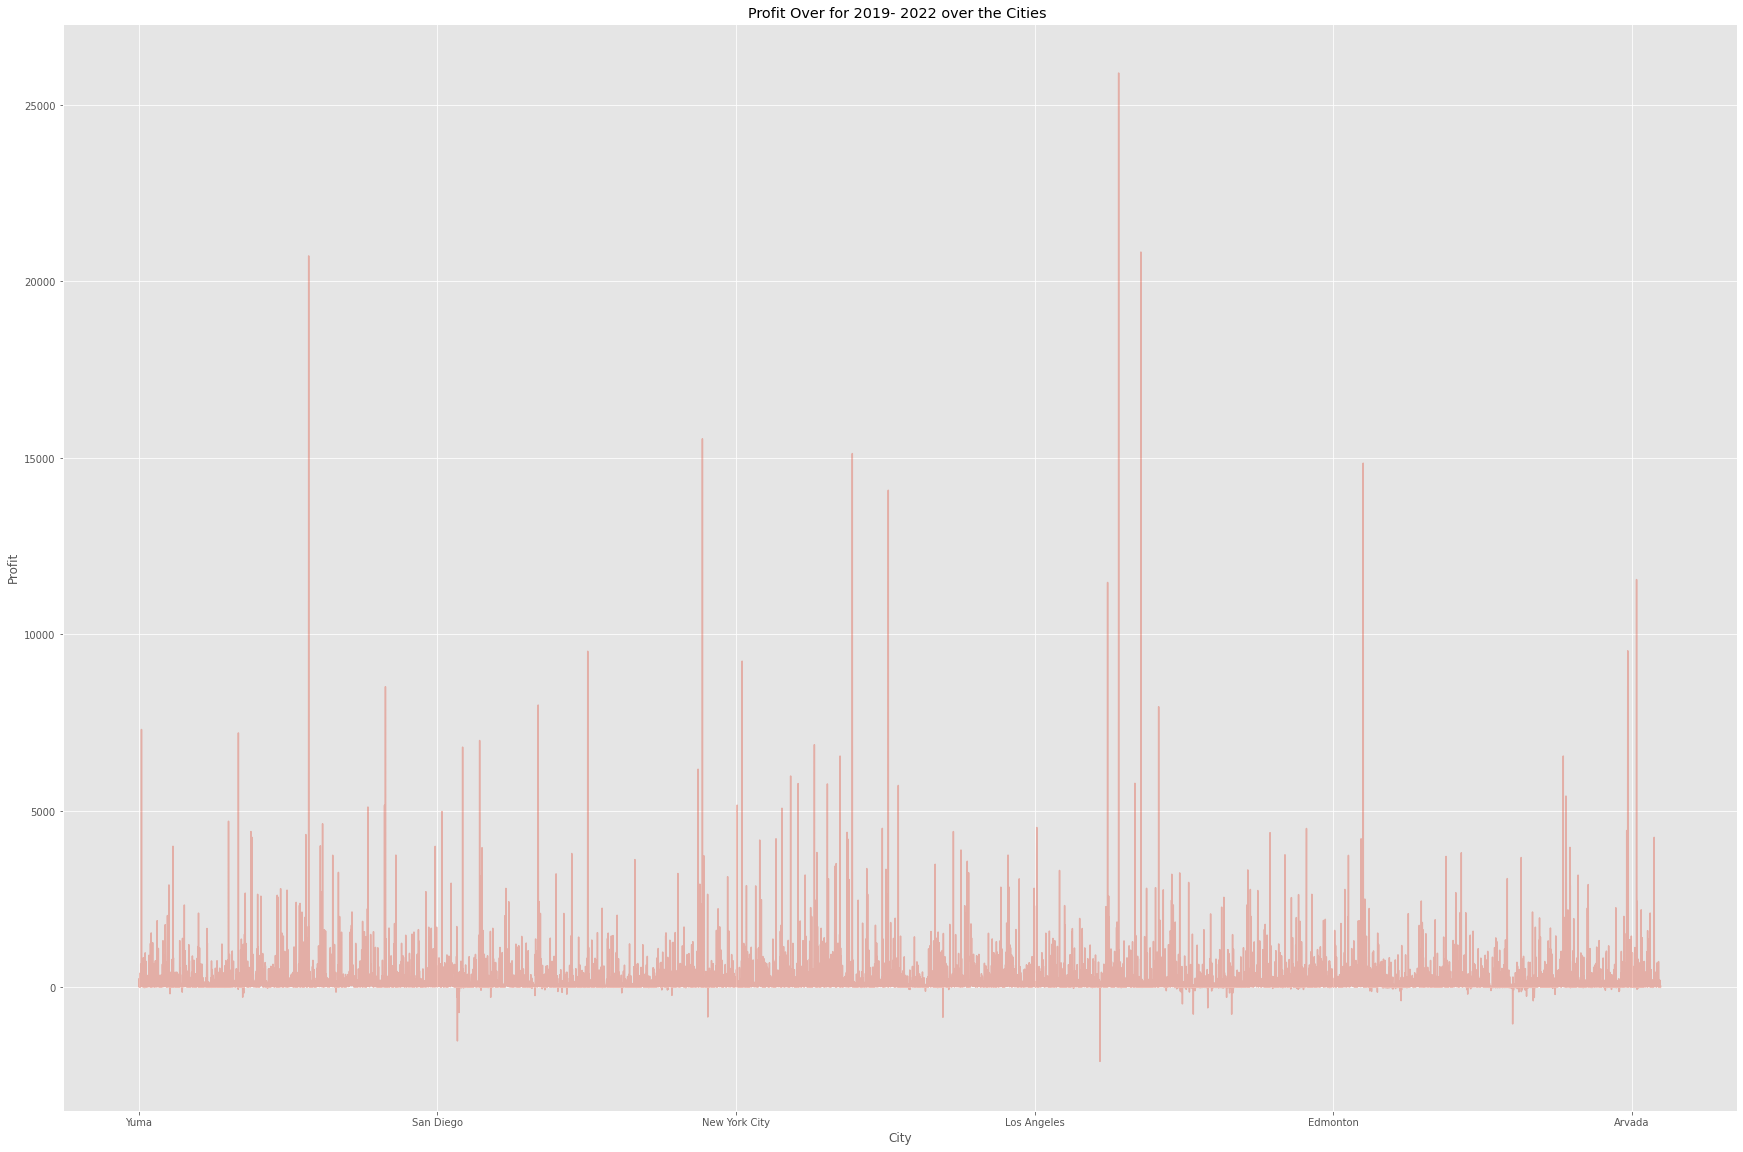

In [ ]:
df_top5.plot(kind='line', 
             alpha=0.35,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(30, 20))

plt.title('Profit Over for 2019- 2022 over the Cities ')
plt.ylabel('Profit')
plt.xlabel('City')

plt.show()

In [ ]:
df4['State/Province'].head()

City
Yuma          Arizona
Yuma          Arizona
Yuma          Arizona
Yuma          Arizona
Yucaipa    California
Name: State/Province, dtype: object

In [ ]:
df4.set_index('Region', inplace=True)

df4.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Postal Code,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,,,,,,,,,,
Central,US-2019-103800,2019-01-03,2019-1,2019-01-07,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,77095,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,5.5512
Central,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,60540,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2.0,0.8,-5.4870
Central,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,60540,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,4.2717
Central,US-2019-112326,2019-01-04,2019-1,2019-01-08,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,60540,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3.0,0.2,-64.7748
East,US-2019-141817,2019-01-05,2019-1,2019-01-12,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,19143,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.0,0.2,4.8840


In [ ]:
df4['Profit'] = df4.sum(axis=1)

df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Regional Manager,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,,,,,,,,,
Technology,US-2021-108224,2021-05-14,2021-20,2021-05-14,2021-20,Same Day,TH-21235,Tiffany House,Corporate,United States,Arizona,85364,Sadie Pawthorne,TEC-AC-10003832,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,626.8851,7.0,0.2,1068.2422
Technology,US-2022-157672,2022-10-05,2022-41,2022-10-07,2022-41,First Class,RB-19795,Ross Baird,Home Office,United States,Colorado,80219,Sadie Pawthorne,TEC-AC-10001714,Accessories,Logitech MX Performance Wireless Mouse,211.6346,2.0,0.2,359.4452
Office Supplies,US-2021-114727,2021-07-18,2021-30,2021-07-24,2021-30,Standard Class,LS-16945,Linda Southworth,Corporate,United States,Colorado,80219,Sadie Pawthorne,OFF-ST-10000689,Storage,"Fellowes Strictly Business Drawer File, Letter...",989.9160,3.0,0.2,1641.7920
Furniture,US-2019-133690,2019-08-03,2019-31,2019-08-05,2019-32,First Class,BS-11755,Bruce Stewart,Consumer,United States,Colorado,80219,Sadie Pawthorne,FUR-TA-10004289,Tables,BoxOffice By Design Rectangular and Half-Moon ...,501.8750,2.0,0.5,785.0000
Office Supplies,US-2021-114727,2021-07-18,2021-30,2021-07-24,2021-30,Standard Class,LS-16945,Linda Southworth,Corporate,United States,Colorado,80219,Sadie Pawthorne,OFF-ST-10002292,Storage,"Sauder Facets Collection Locker/File Cabinet, ...",1787.3040,2.0,0.2,2981.0400


In [ ]:
print('data dimensions:', df4.shape)

data dimensions: (10194, 20)


In [ ]:
df4.sort_values(['Region'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df4.head()

# transpose the dataframe
df_top5 = df4['Profit'].transpose()

df_top5.head()



Region
West     2.2728
West     7.7035
West    17.8152
West     0.8058
West     0.3864
Name: Profit, dtype: float64

In [ ]:
df4.set_index('Category', inplace=True)

In [ ]:
df4['Sales'] = df4.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df4_Categories = df4.groupby('Category', axis=0).count()
print(type(df4.groupby('Category', axis=0)))

df4_Categories.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Regional Manager,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,,,,,,,,,
Furniture,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201
Office Supplies,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130
Technology,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863,1863


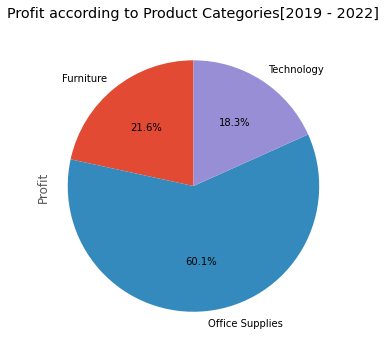

In [ ]:

df4_Categories['Profit'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                                  # add shadow      
                            )

plt.title('Profit according to Product Categories[2019 - 2022]')
plt.axis('equal') 

plt.show()

In [ ]:
import numpy as np

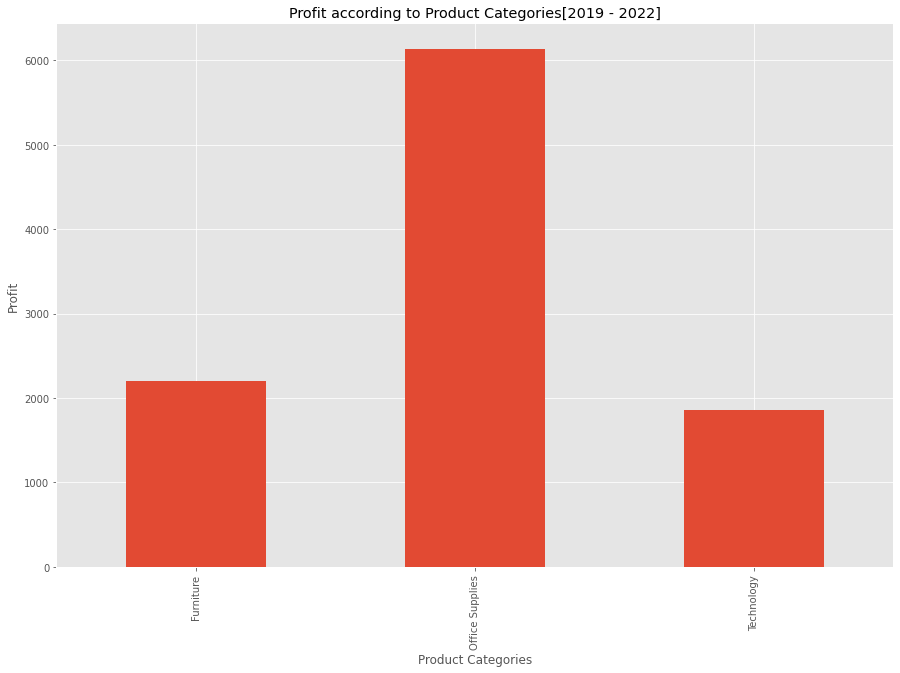

In [ ]:
df4_Categories['Profit'].plot(kind='bar', figsize=(15, 10))

plt.xlabel('Product Categories') # add to x-label to the plot
plt.ylabel('Profit') # add y-label to the plot
plt.title('Profit according to Product Categories[2019 - 2022]') # add title to the plot

plt.show()

In [ ]:
df4_Region= df4.groupby(['Region'], axis=0).count()
print(type(df4.groupby([ 'Region'], axis=0)))

df4_Region.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Postal Code,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,,,,,,,,,,
Central,2335,2335,2335,2335,2335,2335,2335,2335,2335,2335,...,2335,2335,2335,2335,2335,2335,2335,2335,2335,2335
East,2986,2986,2986,2986,2986,2986,2986,2986,2986,2986,...,2986,2986,2986,2986,2986,2986,2986,2986,2986,2986
South,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,...,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620
West,3253,3253,3253,3253,3253,3253,3253,3253,3253,3253,...,3253,3253,3253,3253,3253,3253,3253,3253,3253,3253


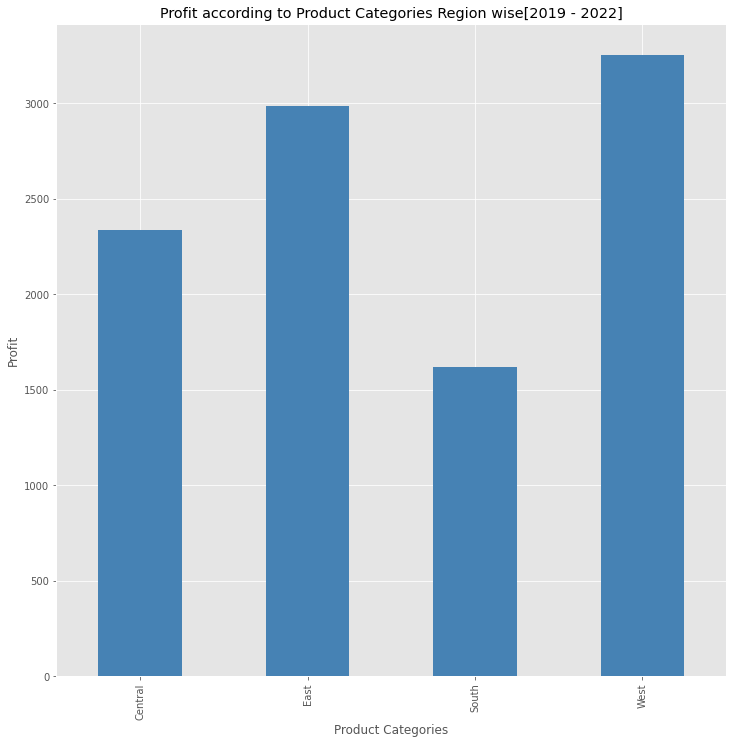

In [ ]:
df4_Region['Profit'].plot(kind='bar', figsize=(12, 12), color='steelblue')


plt.xlabel('Product Categories') # add to x-label to the plot
plt.ylabel('Profit') # add y-label to the plot
plt.title('Profit according to Product Categories Region wise[2019 - 2022]') 

plt.show()

In [ ]:
df4_sales = df4.groupby(['Category'], axis=0).sum()
#print(type(df3.groupby('Category', axis=0)))

df4_sales.head()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,2.310222e+06,8369.0,380.69,1.546725e+06
Office Supplies,2.409383e+06,23271.0,958.50,1.648386e+06
Technology,2.673009e+06,7014.0,244.80,1.830731e+06


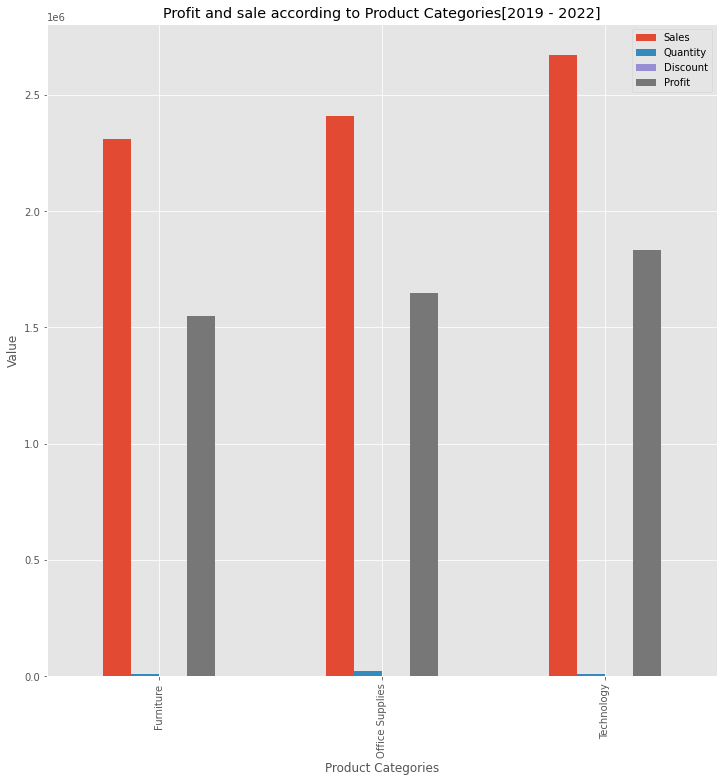

In [ ]:
#df3_sales['Profit'].plot(kind='line', figsize=(12, 12), color='steelblue')
#df3_sales.index = df3_sales.index.map(int) 
df4_sales.plot(kind='bar',figsize=(12, 12))

plt.xlabel('Product Categories') # add to x-label to the plot
plt.ylabel('Value') # add y-label to the plot
plt.title('Profit and sales according to Product Categories[2019 - 2022]') # add title to the plot

plt.show()

**Analysis**

*   According to the graphs Most profitable product is Office Supplies.
*   Geographically most profitable region is western 



### Question 4






In [ ]:
spark = SparkSession.builder.appName('DS Internship Task2').getOrCreate()
spark

In [ ]:
GS_DailyT_Pdf = pd.read_excel('/content/DS_DE Internship - GS Sales Data 2022.xlsx',sheet_name='Daily Target', index_col=0,
                             na_values='#N/A')
# Display top 5 record loaded into Pandas DF
GS_DailyT_Pdf.tail()

,Order Date,Segment,Sales Target
Category,,,
Furniture,2022-12-30,Consumer,284.0
Office Supplies,2022-12-30,Consumer,61.0
Office Supplies,2022-12-30,Corporate,29.0
Office Supplies,2022-12-30,Home Office,199.0
Technology,2022-12-30,Consumer,80.0


In [ ]:
df4.tail()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,
10190.0,US-2022-143259,2022-12-30,2022-53,2023-01-03,2023-1,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,...,East,Chuck Magee,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3.0,0.2,19.7910
10191.0,US-2022-115427,2022-12-30,2022-53,2023-01-03,2023-1,Standard Class,EB-13975,Erica Bern,Corporate,United States,...,West,Sadie Pawthorne,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2.0,0.2,6.4750
10192.0,US-2022-156720,2022-12-30,2022-53,2023-01-03,2023-1,Standard Class,JM-15580,Jill Matthias,Consumer,United States,...,West,Sadie Pawthorne,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3.0,0.2,-0.6048
10193.0,US-2022-143259,2022-12-30,2022-53,2023-01-03,2023-1,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,...,East,Chuck Magee,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7.0,0.0,2.7279
10194.0,CA-2022-143500,2022-12-30,2022-53,2023-01-03,2023-1,Standard Class,HO-15230,Harry Olson,Consumer,Canada,...,East,Chuck Magee,OFF-BI-10004040,Office Supplies,Binders,Wilson Jones Impact Binders,3.024,3.0,0.2,-0.6048


In [ ]:
GS_DailyT_Pdf[['Segment','Sales Target']] = GS_DailyT_Pdf[[ 'Segment','Sales Target']].astype(str)

In [ ]:
# Create Spark Dataframe
Daily_Target = spark.createDataFrame(GS_DailyT_Pdf)

# View first 20 rows in spark dataframe 
Daily_Target.show()

+-------------------+-----------+------------+
|         Order Date|    Segment|Sales Target|
+-------------------+-----------+------------+
|2019-01-03 00:00:00|   Consumer|        15.0|
|2019-01-04 00:00:00|Home Office|       300.0|
|2019-01-05 00:00:00|   Consumer|        21.0|
|2019-01-06 00:00:00|Home Office|      2316.0|
|2019-01-06 00:00:00|   Consumer|        17.0|
|2019-01-06 00:00:00|  Corporate|        14.0|
|2019-01-06 00:00:00|Home Office|       699.0|
|2019-01-06 00:00:00|Home Office|      1068.0|
|2019-01-07 00:00:00|   Consumer|        81.0|
|2019-01-07 00:00:00|   Consumer|        11.0|
|2019-01-09 00:00:00|   Consumer|         9.0|
|2019-01-09 00:00:00|   Consumer|        29.0|
|2019-01-10 00:00:00|  Corporate|        47.0|
|2019-01-10 00:00:00|  Corporate|         3.0|
|2019-01-11 00:00:00|   Consumer|         9.0|
|2019-01-13 00:00:00|   Consumer|       792.0|
|2019-01-13 00:00:00|   Consumer|      1387.0|
|2019-01-13 00:00:00|  Corporate|       570.0|
|2019-01-13 0

In [ ]:
# View spark Data Frame Schema
Daily_Target.printSchema()


root
 |-- Order Date: timestamp (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Sales Target: string (nullable = true)



In [ ]:
type(Daily_Target)

pyspark.sql.dataframe.DataFrame

In [ ]:
# Create New Spark Dataframe and Transform Column Headings and Data Types

Daily_Target_finalDF = (Daily_Target.withColumn("order_date", to_date(col("Order Date"), "yyyy/mm/dd")).drop("Order Date")
                        .withColumn("customer_segment", Daily_Target["Segment"]).drop("Segment")
                        .withColumn("sales_target",Daily_Target["Sales Target"].cast('float')).drop("Sales Target")
                        
                        .distinct()
            ) 

Daily_Target_finalDF.show(20)

+----------+----------------+------------+
|order_date|customer_segment|sales_target|
+----------+----------------+------------+
|2019-04-18|        Consumer|       444.0|
|2019-12-24|       Corporate|       257.0|
|2020-04-05|        Consumer|        48.0|
|2020-06-12|        Consumer|        47.0|
|2020-10-03|        Consumer|        34.0|
|2020-11-08|       Corporate|      5246.0|
|2020-12-15|     Home Office|         3.0|
|2019-03-18|     Home Office|      1536.0|
|2019-04-08|        Consumer|       162.0|
|2019-06-21|        Consumer|      4043.0|
|2019-07-26|        Consumer|      2145.0|
|2019-09-19|        Consumer|        73.0|
|2020-02-03|       Corporate|        12.0|
|2020-05-03|     Home Office|       593.0|
|2020-05-31|        Consumer|      4213.0|
|2020-07-11|       Corporate|       687.0|
|2020-07-19|        Consumer|         2.0|
|2020-10-15|     Home Office|       296.0|
|2019-01-06|     Home Office|      1068.0|
|2019-02-01|        Consumer|       506.0|
+----------

In [ ]:
# Create spark SQL Select query to retrieve customer data as a DataFrame from a temporary table view
Daily_Target_finalDF.createOrReplaceTempView("daily_target")


In [ ]:
NewTable_sqlDF = spark.sql("SELECT order_date,	customer_segment,sales_target FROM daily_target")
NewTable_sqlDF.show()
pandasDF1 = NewTable_sqlDF.toPandas()


+----------+----------------+------------+
|order_date|customer_segment|sales_target|
+----------+----------------+------------+
|2019-04-18|        Consumer|       444.0|
|2019-12-24|       Corporate|       257.0|
|2020-04-05|        Consumer|        48.0|
|2020-06-12|        Consumer|        47.0|
|2020-10-03|        Consumer|        34.0|
|2020-11-08|       Corporate|      5246.0|
|2020-12-15|     Home Office|         3.0|
|2019-03-18|     Home Office|      1536.0|
|2019-04-08|        Consumer|       162.0|
|2019-06-21|        Consumer|      4043.0|
|2019-07-26|        Consumer|      2145.0|
|2019-09-19|        Consumer|        73.0|
|2020-02-03|       Corporate|        12.0|
|2020-05-03|     Home Office|       593.0|
|2020-05-31|        Consumer|      4213.0|
|2020-07-11|       Corporate|       687.0|
|2020-07-19|        Consumer|         2.0|
|2020-10-15|     Home Office|       296.0|
|2019-01-06|     Home Office|      1068.0|
|2019-02-01|        Consumer|       506.0|
+----------

In [ ]:
# Create spark SQL Select query to retrieve quantity data as a DataFrame from a temporary table view
GS_Sales_finalDF.createOrReplaceTempView("sales")

NewTable2_sqlDF = spark.sql("SELECT order_date,order_week_no,sales_quantity FROM sales")
NewTable2_sqlDF.show()
pandasDF2 = NewTable2_sqlDF.toPandas()

+----------+-------------+--------------+
|order_date|order_week_no|sales_quantity|
+----------+-------------+--------------+
|2019-01-09|       2019-2|           3.0|
|2019-04-12|      2019-15|           3.0|
|2019-04-16|      2019-16|           6.0|
|2019-05-07|      2019-19|           3.0|
|2019-05-22|      2019-21|           2.0|
|2019-06-13|      2019-24|           3.0|
|2019-07-12|      2019-28|           7.0|
|2019-08-05|      2019-32|           3.0|
|2019-09-29|      2019-40|           6.0|
|2019-09-29|      2019-40|           2.0|
|2019-10-10|      2019-41|           1.0|
|2020-03-01|      2020-10|           4.0|
|2020-05-17|      2020-21|           3.0|
|2020-08-24|      2020-35|           5.0|
|2020-11-01|      2020-45|           4.0|
|2020-11-07|      2020-45|          10.0|
|2020-11-14|      2020-46|           3.0|
|2020-11-19|      2020-47|           4.0|
|2020-11-21|      2020-47|           2.0|
|2020-11-24|      2020-48|           2.0|
+----------+-------------+--------

In [ ]:
##create a new table with merged data with quantities with order date

df_n=pandasDF1.merge(pandasDF2[['order_date', 'sales_quantity','order_week_no']], left_on='order_date', right_on='order_date', how='left')
df_n.head()

,order_date,customer_segment,sales_target,sales_quantity,order_week_no
0,2019-04-18,Consumer,444.0,3.0,2019-16
1,2019-04-18,Consumer,444.0,2.0,2019-16
2,2019-04-18,Consumer,444.0,3.0,2019-16
3,2019-04-18,Consumer,444.0,4.0,2019-16
4,2019-04-18,Consumer,444.0,4.0,2019-16


In [ ]:
df_n.tail(7)

,order_date,customer_segment,sales_target,sales_quantity,order_week_no
50515,2022-07-16,Home Office,3.0,2.0,2022-29
50516,2022-07-16,Home Office,3.0,3.0,2022-29
50517,2022-08-23,Consumer,231.0,2.0,2022-35
50518,2022-08-23,Consumer,231.0,13.0,2022-35
50519,2022-08-23,Consumer,231.0,5.0,2022-35
50520,2022-08-23,Consumer,231.0,2.0,2022-35
50521,2022-08-23,Consumer,231.0,6.0,2022-35


In [ ]:
##we want to predict future week quantities

df_n_sales = df_n.groupby(['customer_segment','order_date'], axis=0).sum()
#print(type(df3.groupby('Category', axis=0)))

df_m=df_n_sales.tail(7)



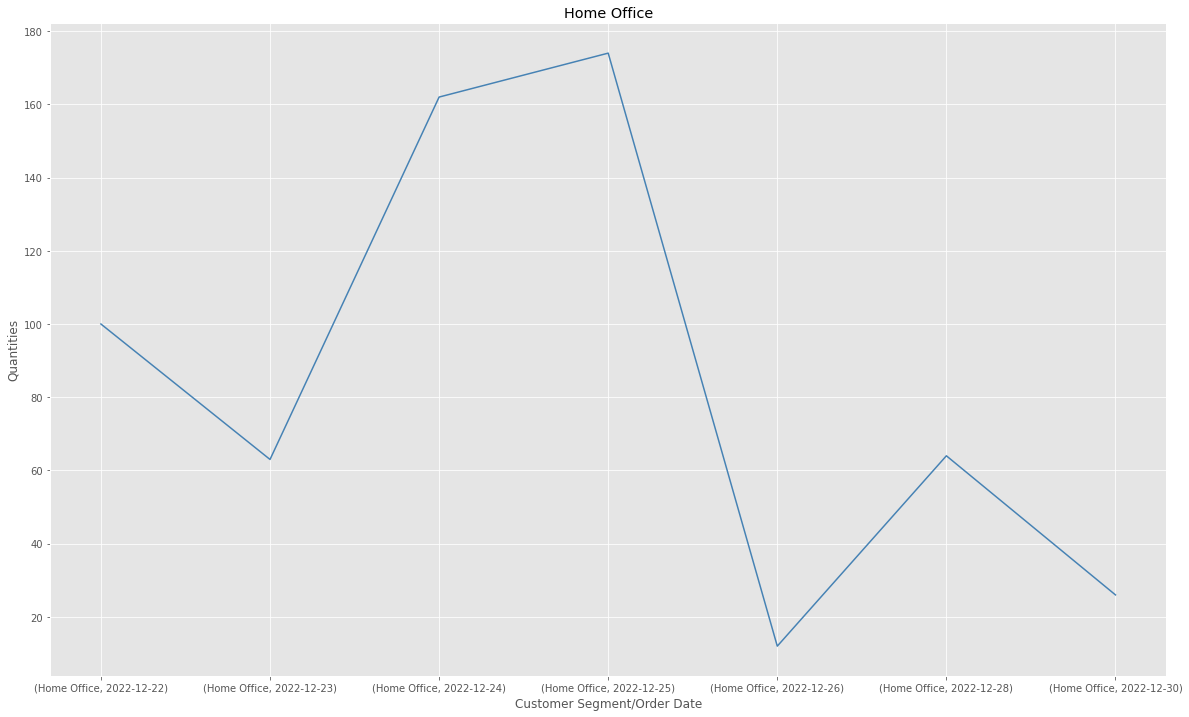

In [ ]:
df_m['sales_quantity'].plot(kind='line', figsize=(20, 12), color='steelblue')


plt.xlabel('Customer Segment/Order Date') # add to x-label to the plot
plt.ylabel('Quantities') # add y-label to the plot
plt.title('Home Office') # add title to the plot

plt.show()

In [ ]:
from pyspark.ml.feature import StringIndexer

In [ ]:
indexer=StringIndexer(inputCols=["customer_segment","sales_target","sales_quantity"] , outputCols=["Segment_indexed","Sales_Target_indexed","Quantity_indexed"])
df_n1=indexer.fit(df_n).transform(df_n)
df_n1.show()

AttributeError: ignored

In [ ]:
df_n.filter("order_week_no = 2022-35").select(['Segment']).show()

AttributeError: ignored

In [ ]:
df4.tail(10)

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Postal Code,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,,,,,,,,,,
Central,US-2020-111948,2020-11-11,2020-46,2020-11-11,2020-46,Same Day,AG-10495,Andrew Gjertsen,Corporate,United States,...,48234,Roxanne Rodriguez,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",418.320,7.0,0.0,117.1296
Central,US-2022-121559,2022-06-01,2022-23,2022-06-03,2022-23,Second Class,HW-14935,Helen Wasserman,Corporate,United States,...,46203,Roxanne Rodriguez,OFF-AP-10002945,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2405.200,8.0,0.0,793.7160
Central,US-2022-121559,2022-06-01,2022-23,2022-06-03,2022-23,Second Class,HW-14935,Helen Wasserman,Corporate,United States,...,46203,Roxanne Rodriguez,OFF-BI-10002072,Office Supplies,Binders,Cardinal Slant-D Ring Binders,17.380,2.0,0.0,8.6900
Central,US-2020-111948,2020-11-11,2020-46,2020-11-11,2020-46,Same Day,AG-10495,Andrew Gjertsen,Corporate,United States,...,48234,Roxanne Rodriguez,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,123.858,2.0,0.1,46.7908
Central,US-2022-146493,2022-06-01,2022-23,2022-06-05,2022-24,Standard Class,CV-12805,Cynthia Voltz,Corporate,United States,...,68025,Roxanne Rodriguez,OFF-BI-10003676,Office Supplies,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",53.900,5.0,0.0,25.8720
Central,US-2020-121783,2020-11-10,2020-46,2020-11-14,2020-46,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,...,55113,Roxanne Rodriguez,TEC-CO-10001571,Technology,Copiers,Sharp 1540cs Digital Laser Copier,549.990,1.0,0.0,274.9950
Central,US-2020-158659,2020-11-10,2020-46,2020-11-14,2020-46,Second Class,SC-20695,Steve Chapman,Corporate,United States,...,47374,Roxanne Rodriguez,OFF-ST-10003306,Office Supplies,Storage,Letter Size Cart,714.300,5.0,0.0,207.1470
Central,US-2022-121559,2022-06-01,2022-23,2022-06-03,2022-23,Second Class,HW-14935,Helen Wasserman,Corporate,United States,...,46203,Roxanne Rodriguez,TEC-AC-10001714,Technology,Accessories,Logitech MX Performance Wireless Mouse,39.890,1.0,0.0,14.7593
Central,US-2022-121559,2022-06-01,2022-23,2022-06-03,2022-23,Second Class,HW-14935,Helen Wasserman,Corporate,United States,...,46203,Roxanne Rodriguez,TEC-AC-10004568,Technology,Accessories,Maxell LTO Ultrium - 800 GB,83.970,3.0,0.0,15.9543


I wanted to make a table where segment, order week, quantities, target sales in the same table and filter out last week data by segment wise and predict future week data. I try to find a way to do it.